In [308]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [405]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score,confusion_matrix,precision_score,f1_score,accuracy_score,classification_report

In [310]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [311]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [312]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [313]:
df.shape

(7043, 21)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [315]:
df = df.drop(["customerID"], axis=1)

In [316]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [317]:
df["Churn"].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [318]:
df["TotalCharges"] = pd.to_numeric(df.TotalCharges,errors="coerce")
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [319]:
np.isnan(df["TotalCharges"]).sum()

np.int64(11)

In [320]:
df[np.isnan(df["TotalCharges"])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [321]:
df[df["tenure"] == 0 ].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [322]:
df.drop(df[df["tenure"] == 0 ].index,inplace=True)

In [323]:
df[df["tenure"] == 0].index

Index([], dtype='int64')

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [325]:
df.fillna(df["TotalCharges"].mean() ,inplace=True)

In [326]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [327]:
df["InternetService"].describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [328]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Gender and Churn Distribution

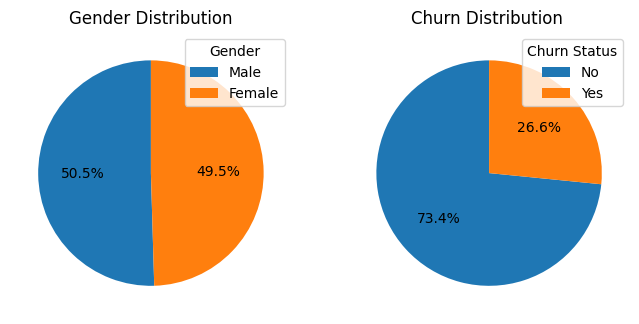

In [329]:
ch_percent=df["Churn"].value_counts(normalize=True)*100
G_percent=df["gender"].value_counts(normalize=True)*100

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Gender Distribution")
plt.pie(G_percent,autopct="%1.1f%%",startangle=90,)
plt.legend(G_percent.index,loc="upper right",title="Gender")

plt.subplot(1,2,2)
plt.pie(ch_percent,autopct="%1.1f%%",startangle=90)
plt.title("Churn Distribution ")
plt.legend(ch_percent.index,title="Churn Status",loc="upper right")

# churn vs gender distribution in percent

In [330]:
fyp=939*100/7032
myp=930*100/7032
fyp=round(fyp,2)
myp=round(myp,2)
yes_churn=[fyp,myp]


fnp=2544*100/7032
mnp=2619*100/7032
fnp=round(fnp,2)
mnp=round(mnp,2)
no_churn=[fnp,mnp]



Text(0.5, 1.0, 'Overall Gender-wise Churn Distribution')

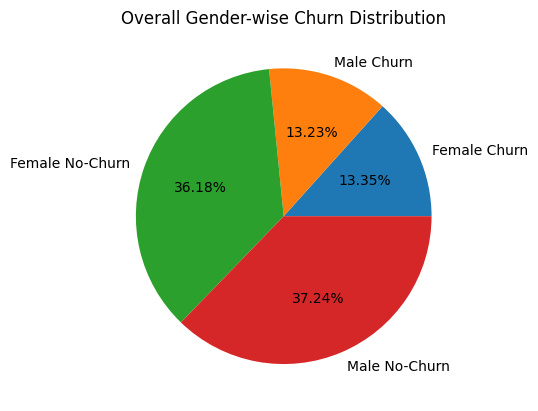

In [331]:
labels = ['Female Churn','Male Churn','Female No-Churn','Male No-Churn']
sizes  = [fyp, myp, fnp, mnp]

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Overall Gender-wise Churn Distribution")

# Churn count by gender 

In [332]:
df[["gender","Churn"]].value_counts().unstack()

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


Text(0.5, 1.0, 'Churn count by gender ')

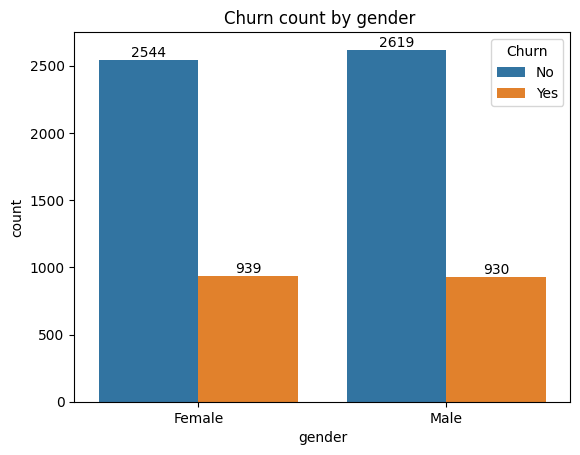

In [333]:
ax=sns.countplot(data=df,x='gender',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn count by gender ")

# customer contract distribution 

Text(0.5, 1.0, 'customer contract distribution')

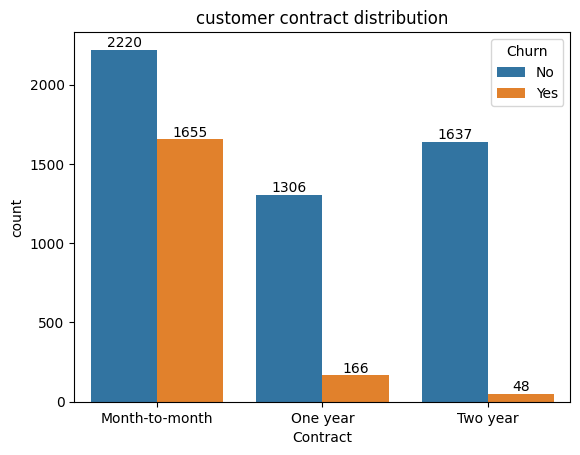

In [334]:
ax1=sns.countplot(data=df,x="Contract",hue="Churn")
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.title("customer contract distribution")


In [335]:
df[["Contract","Churn"]].value_counts().unstack()

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


[Text(0, 0, '57.29%'), Text(0, 0, '88.72%'), Text(0, 0, '97.15%')]

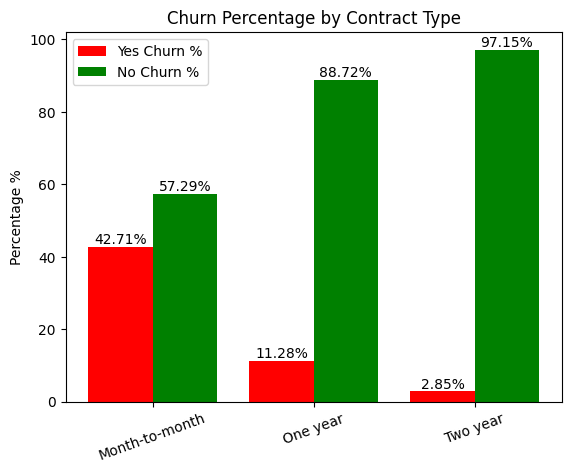

In [336]:
data = {
    "Contract":["Month-to-month","One year","Two year"],
    "No":[2220,1306,1637],
    "Yes":[1655,166,48]
}

dff = pd.DataFrame(data)

# Calculate %
dff["No %"]  = round(dff["No"] / (dff["No"]+dff["Yes"]) * 100,2)
dff["Yes %"] = round(dff["Yes"] / (dff["No"]+dff["Yes"]) * 100,2)

labels = dff["Contract"]
yes = dff["Yes %"]
no  = dff["No %"]

x = np.arange(len(labels))
fig, ax = plt.subplots()

b1 = ax.bar(x-0.2, yes, width=0.4, label="Yes Churn %", color='red')
b2 = ax.bar(x+0.2, no,  width=0.4, label="No Churn %",  color='green')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20)
ax.set_ylabel("Percentage %")
ax.set_title("Churn Percentage by Contract Type")
ax.legend()

#  Add numbers above each bar
ax.bar_label(b1, fmt="%.2f%%")
ax.bar_label(b2, fmt="%.2f%%")


# payment method distribution

Text(0.5, 1.0, 'payment method distribution')

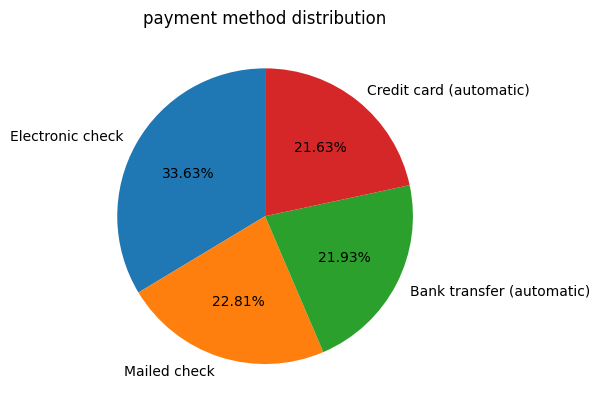

In [337]:
labels=df["PaymentMethod"].unique()
values=df["PaymentMethod"].value_counts()

plt.pie(values,labels=labels,autopct="%1.2f%%",startangle=90)
plt.title("payment method distribution")

Text(0.5, 1.0, ' customer paymentmethod vs churn distribution')

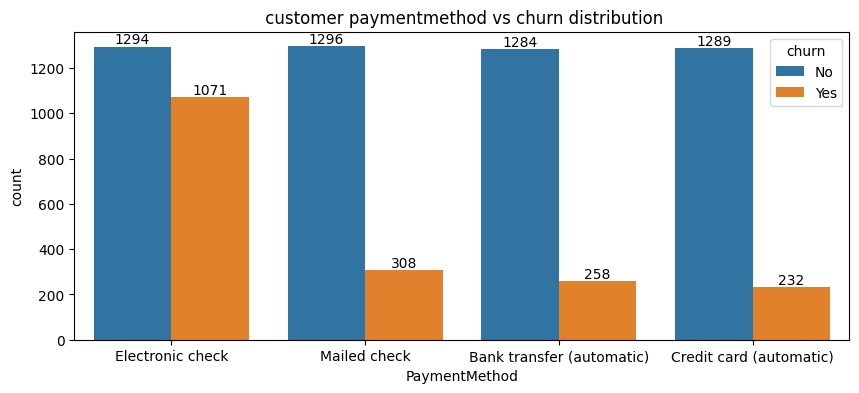

In [338]:
plt.figure(figsize=(10,4))
ax2=sns.countplot(x=df["PaymentMethod"],hue=df["Churn"])
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
plt.legend(title="churn",loc="upper right")
plt.title(" customer paymentmethod vs churn distribution")

# churn vs internetservice and gender 

In [339]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [340]:
df.groupby(["InternetService","gender","Churn"]).size().reset_index(name="count")


,InternetService,gender,Churn,count
0,DSL,Female,No,965
1,DSL,Female,Yes,219
2,DSL,Male,No,992
3,DSL,Male,Yes,240
4,Fiber optic,Female,No,889
5,Fiber optic,Female,Yes,664
6,Fiber optic,Male,No,910
7,Fiber optic,Male,Yes,633
8,No,Female,No,690
9,No,Female,Yes,56


Text(0.5, 1.05, 'Internet Service vs Gender & Churn')

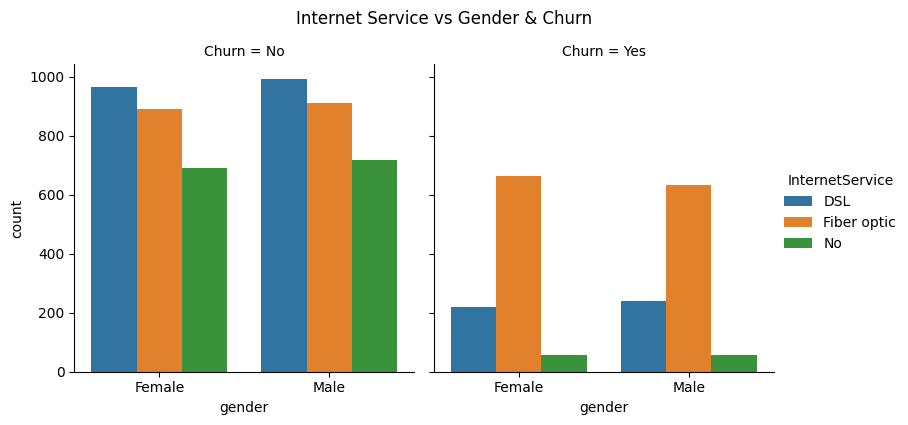

In [341]:
group = df.groupby(["InternetService","gender","Churn"]).size().reset_index(name="count")

g=sns.catplot(
    data=group, 
    x="gender",
    y="count", 
    hue="InternetService", 
    col="Churn", 
    kind="bar",
    height=4,
    aspect=1
)
g.fig.suptitle("Internet Service vs Gender & Churn", y=1.05) 

# Dependents distribution

In [342]:
df[["Dependents","Churn"]].groupby("Churn").value_counts().unstack()

Dependents,No,Yes
Churn,,
No,3390,1773
Yes,1543,326


Text(0.5, 1.0, 'Dependents distribution')

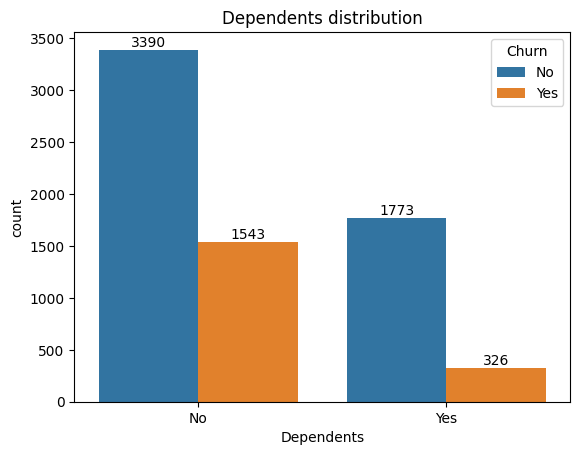

In [343]:
ax3=sns.countplot(x=df["Dependents"],hue=df["Churn"])
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])
plt.title("Dependents distribution")

Customers without dependents are more likely to churn

# partner vs churn distribution

Text(0.5, 1.0, 'partner vs churn distribution')

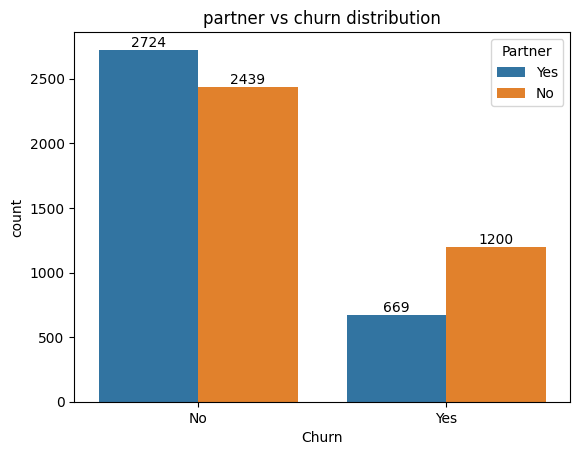

In [344]:
ax4=sns.countplot(x=df["Churn"],hue=df["Partner"])
ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])
plt.title("partner vs churn distribution")

# churn vs senior citizen distribution

Text(0.5, 1.0, 'senior citizen vs churn distribution')

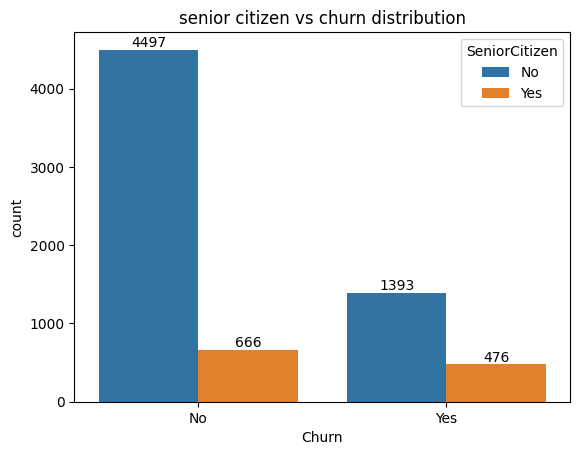

In [345]:
ax5=sns.countplot(x=df["Churn"],hue=df["SeniorCitizen"])
ax5.bar_label(ax5.containers[0])
ax5.bar_label(ax5.containers[1])
ax5.legend(title="SeniorCitizen",labels=["No", "Yes"])
plt.title("senior citizen vs churn distribution")

# churn vs online security distribution


Text(0.5, 1.0, 'churn vs online security')

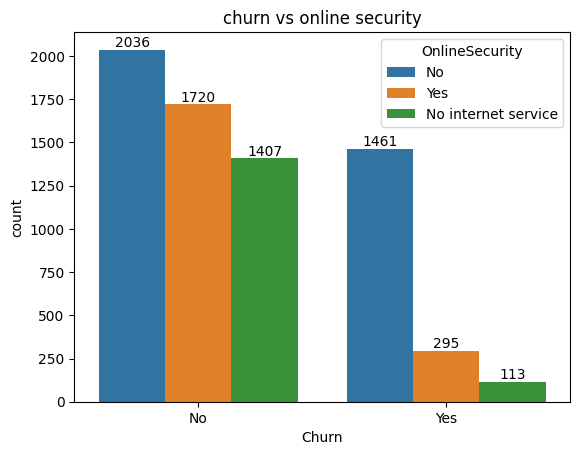

In [346]:
ax6=sns.countplot(x=df["Churn"],hue=df["OnlineSecurity"])
ax6.bar_label(ax6.containers[0])
ax6.bar_label(ax6.containers[1])
ax6.bar_label(ax6.containers[2])
plt.title("churn vs online security")

# churn vs paperless billing

Text(0.5, 1.0, 'churn vs paperless billing')

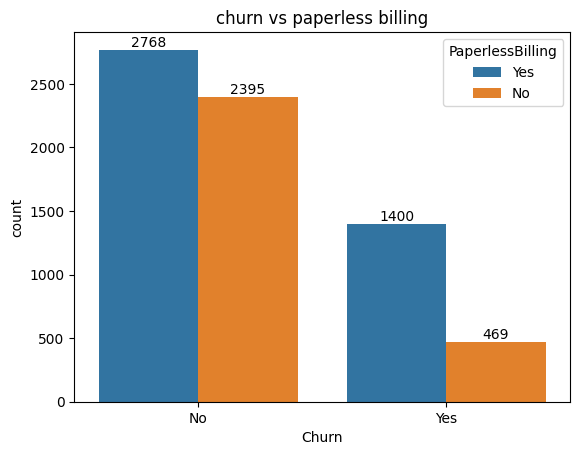

In [347]:
ax7=sns.countplot(x=df["Churn"],hue=df["PaperlessBilling"])
ax7.bar_label(ax7.containers[0])
ax7.bar_label(ax7.containers[1])
plt.title("churn vs paperless billing")

# churn vs tech support 

Text(0.5, 1.0, 'churn vs tech support')

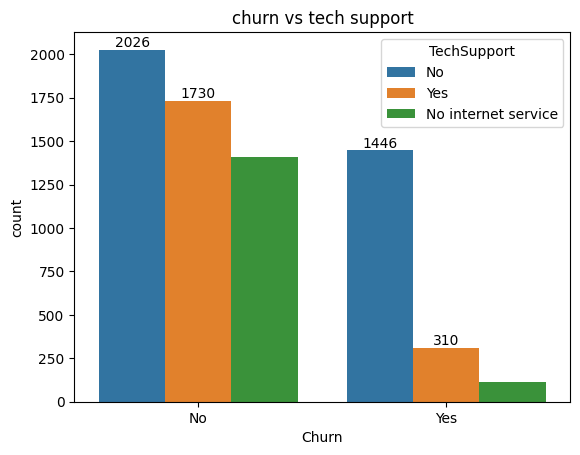

In [348]:
ax8=sns.countplot(x=df["Churn"],hue=df["TechSupport"])
ax8.bar_label(ax8.containers[0])
ax8.bar_label(ax8.containers[1])
plt.title("churn vs tech support")

# churn vs phone service 

Text(0.5, 1.0, 'churn vs phone service')

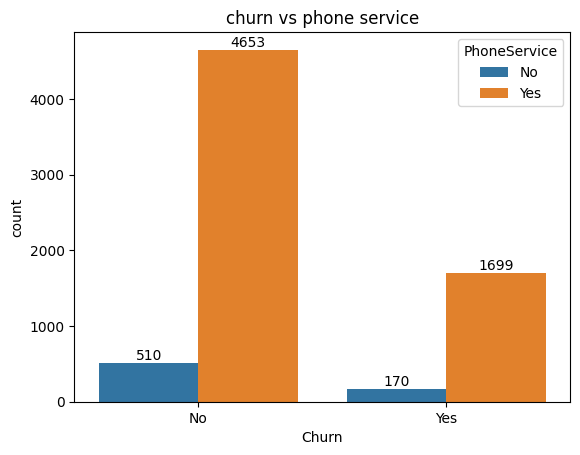

In [349]:
ax9=sns.countplot(x=df["Churn"],hue=df["PhoneService"])
ax9.bar_label(ax9.containers[0])
ax9.bar_label(ax9.containers[1])
plt.title("churn vs phone service")

# Distribution of monthly charges by churn

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

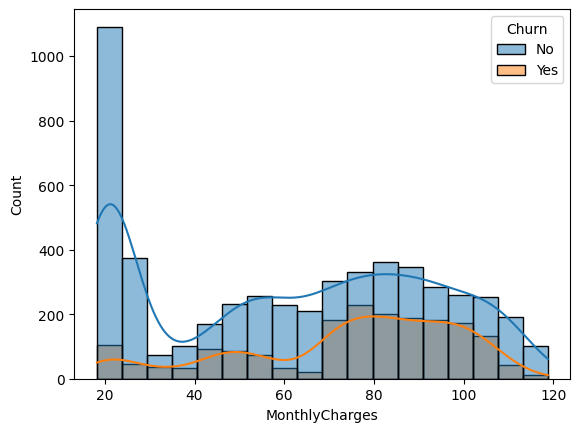

In [350]:
sns.histplot(x=df["MonthlyCharges"],hue=df["Churn"],kde=True)

Text(0.5, 1.0, 'Monthly Charge Distribution by Churn')

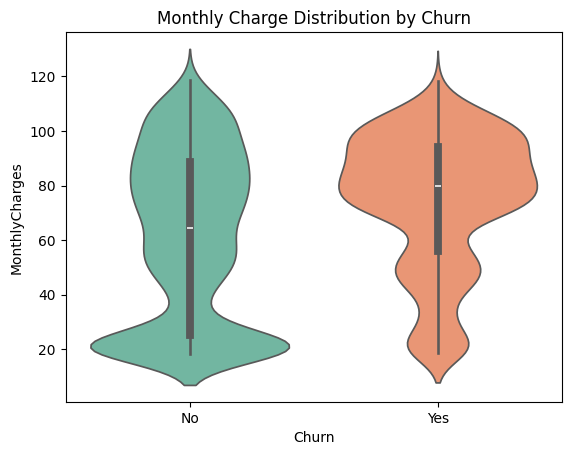

In [351]:
sns.violinplot(data=df, x="Churn", y="MonthlyCharges", palette="Set2")
plt.title("Monthly Charge Distribution by Churn")


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

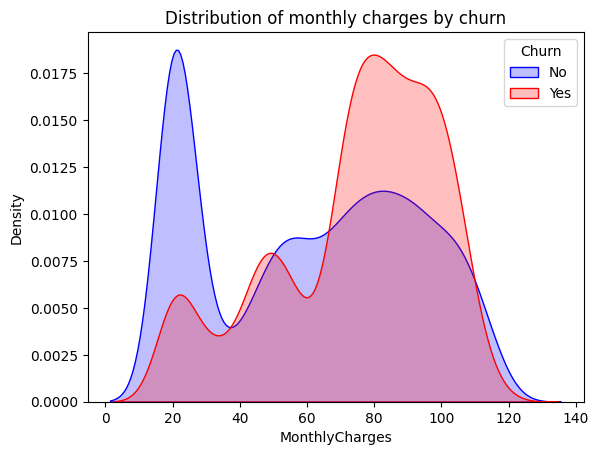

In [352]:
az=sns.kdeplot(df[df["Churn"] == "No"]["MonthlyCharges"],color="Blue",shade=True)
sns.kdeplot(df[df["Churn"] == "Yes"]["MonthlyCharges"],color="Red",shade=True)
az.legend(title="Churn",labels=["No","Yes"])
plt.title("Distribution of monthly charges by churn")


# Distribution of total charges by churn

<Axes: xlabel='TotalCharges', ylabel='Count'>

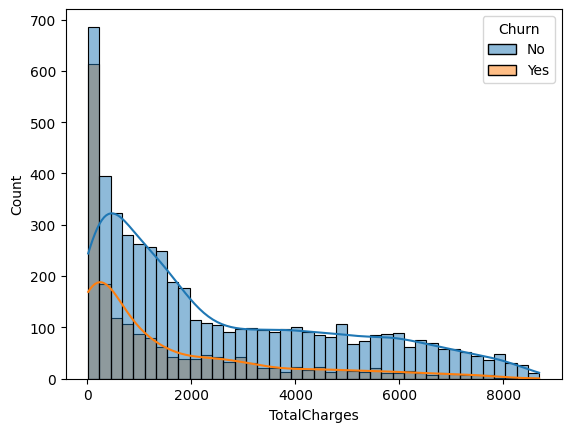

In [353]:
sns.histplot(data=df, x="TotalCharges", hue="Churn", bins=40 ,kde=True)


Text(0.5, 1.0, 'Distribution of total charges by churn')

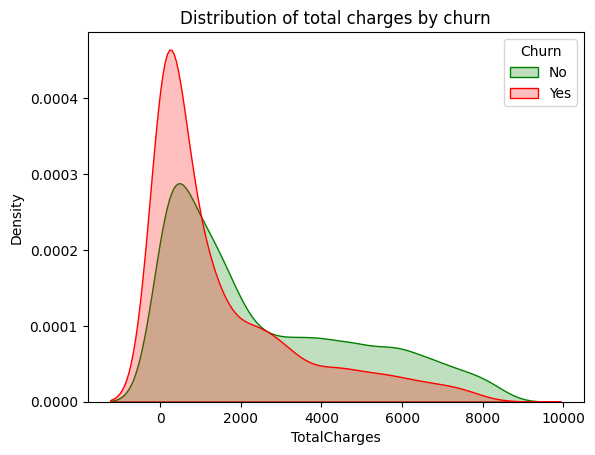

In [354]:
az1=sns.kdeplot(df[df["Churn"] == "No"]["TotalCharges"],color="green",shade=True)
sns.kdeplot(df[df["Churn"] == "Yes"]["TotalCharges"],color="Red",shade=True)
az1.legend(title="Churn",labels=["No","Yes"])
plt.title("Distribution of total charges by churn")

<Axes: xlabel='Churn', ylabel='tenure'>

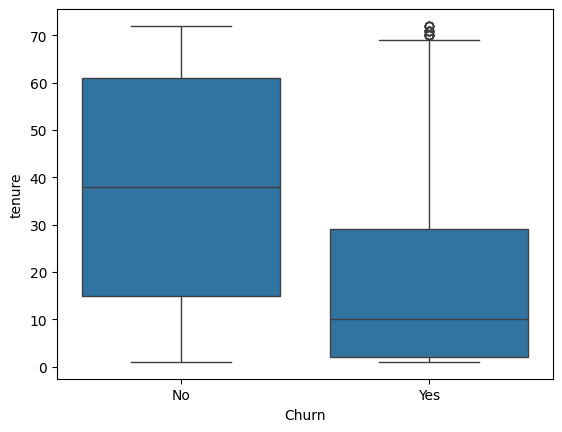

In [355]:
sns.boxplot(x=df["Churn"],y=df["tenure"])

<Axes: >

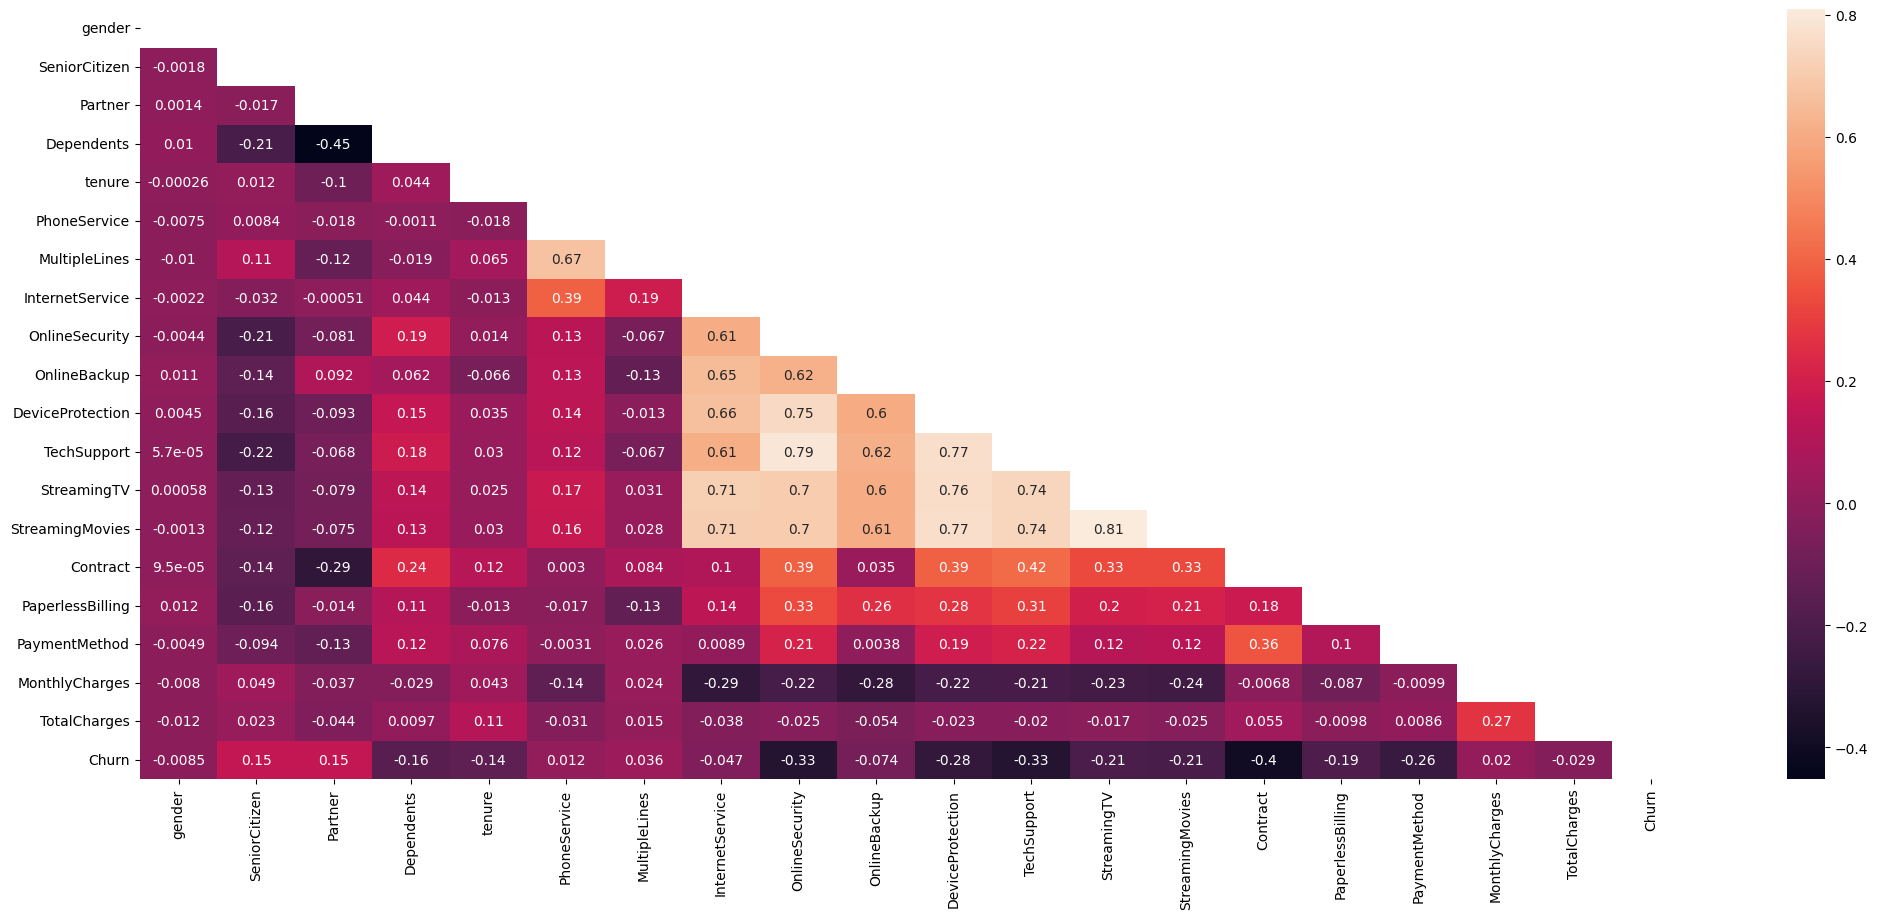

In [356]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [357]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data preprocessing 

In [358]:
df = df.apply(lambda x:pd.factorize(x)[0] if x.dtype == 'object' else x)

In [359]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1


In [360]:
df.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
SeniorCitizen       0.150541
Partner             0.149982
MultipleLines       0.036148
PhoneService        0.011691
gender             -0.008545
InternetService    -0.047097
OnlineBackup       -0.073934
Dependents         -0.163128
PaperlessBilling   -0.191454
TotalCharges       -0.199484
StreamingTV        -0.205246
StreamingMovies    -0.207150
PaymentMethod      -0.262918
DeviceProtection   -0.281048
TechSupport        -0.329474
OnlineSecurity     -0.332443
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

numeric columns are highly distributed 

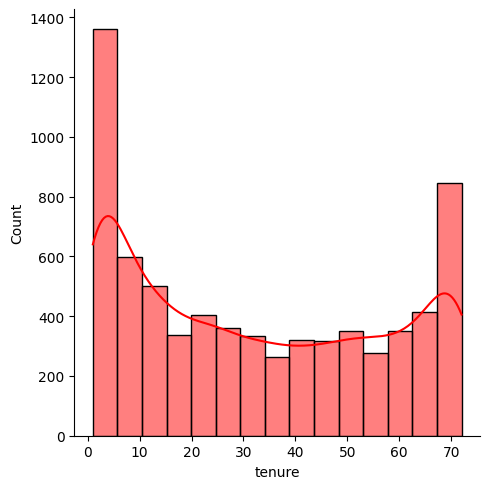

In [361]:
sns.displot(df["tenure"],kde=True,color="r")

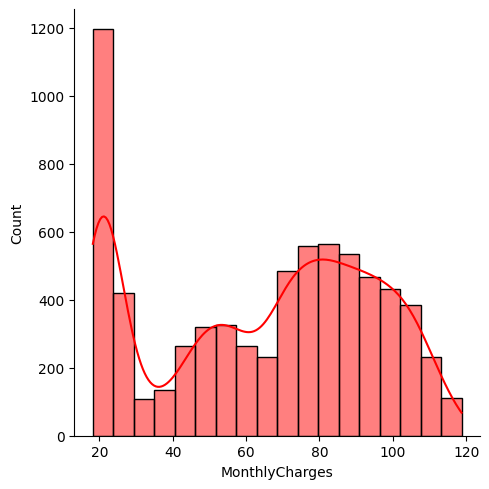

In [362]:
sns.displot(df['MonthlyCharges'],kde=True,color="r")

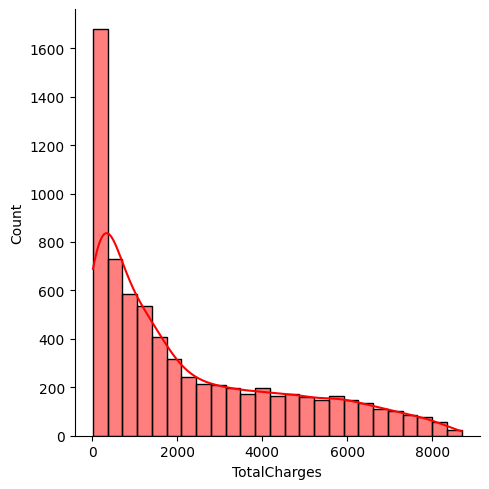

In [363]:
sns.displot(df["TotalCharges"],kde=True,color="r")

These 3 colums are highly distributed so lets stadardscale them 

# graph ditribution after standardscaling 

In [364]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

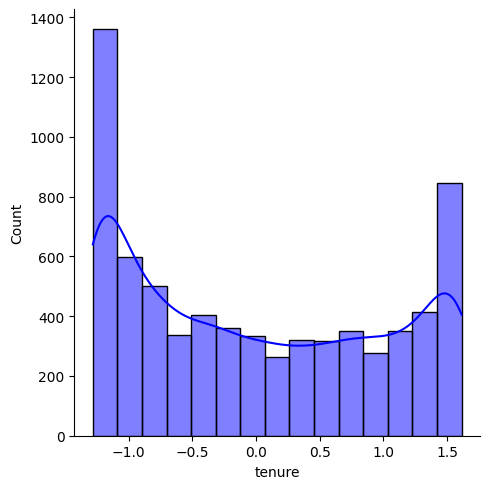

In [365]:
sns.displot(df["tenure"],kde=True,color="b")

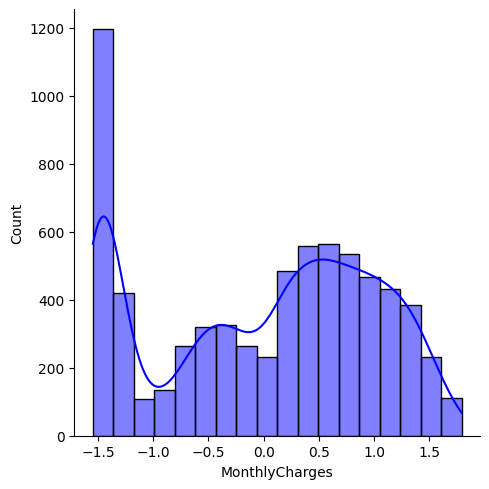

In [366]:
sns.displot(df['MonthlyCharges'],kde=True,color="b")

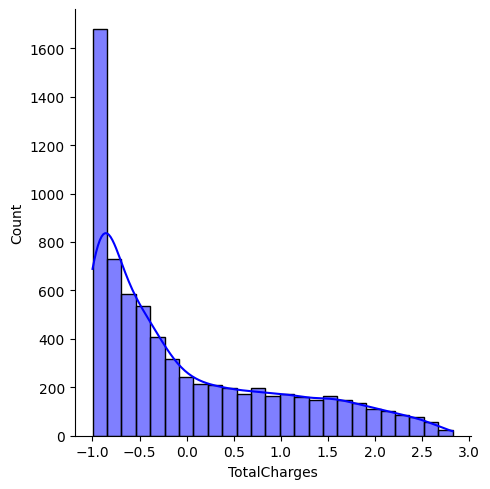

In [367]:
sns.displot(df["TotalCharges"],kde=True,color="b")

In [368]:
X=df.drop(columns=["Churn"])
Y=df["Churn"]

In [369]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state= 40 ,stratify= Y)

In [370]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# machine learning model evolution and prediction

knn

In [373]:
knn_model = KNeighborsClassifier(n_neighbors = 12) 
knn_model.fit(X_train,Y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,Y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.8166311300639659


In [375]:
print(classification_report(Y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1033
           1       0.68      0.58      0.63       374

    accuracy                           0.82      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407



svc

In [377]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,Y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,Y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8137882018479033


In [378]:
print(classification_report(Y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1033
           1       0.71      0.50      0.59       374

    accuracy                           0.81      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



logistic regression

In [398]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
accuracy_lr = lr_model.score(X_test,Y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8081023454157783


In [400]:
lr_pred= lr_model.predict(X_test)
report = classification_report(Y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.66      0.58      0.62       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



decision tree 


In [402]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,Y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7263681592039801


In [403]:
print(classification_report(Y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1033
           1       0.49      0.53      0.51       374

    accuracy                           0.73      1407
   macro avg       0.66      0.67      0.66      1407
weighted avg       0.74      0.73      0.73      1407



In [411]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,-1.280248,0,0,0,0,0,0,0,0,0,0,0,0,-1.161694,-0.994194,0
1,1,0,1,0,0.064303,1,1,0,1,1,1,0,0,0,1,1,1,-0.260878,-0.173740,0
2,1,0,1,0,-1.239504,1,1,0,1,0,0,0,0,0,0,0,1,-0.363923,-0.959649,1
3,1,0,1,0,0.512486,0,0,0,1,1,1,1,0,0,1,1,2,-0.747850,-0.195248,0
4,0,0,1,0,-1.239504,1,1,1,0,1,0,0,0,0,0,0,0,0.196178,-0.940457,1
